# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd # Libraries for reading and manipulating data
import numpy as np
import matplotlib.pyplot as plt # Libraries for data visualization
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

sns.set()

pd.set_option("display.max_columns", None) # To remove limit for the number of displayed columns

pd.set_option("display.max_rows", 200) # To set the limit for the number of displayed rows

from sklearn.model_selection import train_test_split # To split the data into training and testing sets

from sklearn.linear_model import LinearRegression, Ridge, Lasso # To build linear regression model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # To check for model performance

from sklearn.preprocessing import StandardScaler # To scale data for model building


# Load the dataset

In [2]:
# loading the dataset
data = pd.read_csv("used_cars_data-1.csv")


In [3]:
data


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


# Explore the data

In [4]:
# checking the shape of the data
data.shape

(7253, 14)

###### there are 7253 rows and 14 columns in the dataset

In [5]:
# lets view a sample of the data
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [6]:
# lets create a copy of the data
df  = data.copy()
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


In [7]:
# drop the No. column as it does not add any value to the analysis
df.drop("S.No.", axis = 1 , inplace = True)

In [8]:
# checking colunm datatypes and number of nun- null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


### observations
###### 1 Name, Location, Fuel_type, Transmission, Owner_Type, Mileage,Engine and Power are categorical variables
######  2. All other variables are numerical in nature
###### 3. seats should be whole numbers instead of float

In [9]:
# checking for duplicate values
df.duplicated().sum()

1

#### There's only one duplicate value in the data
#### We will drop the duplicate value

In [10]:
# drop the duplicates 
df.drop_duplicates(inplace=True)
# reset the index
df.reset_index(drop =True , inplace = True)

In [11]:
# checking the statistical summary of the data
df.describe(include= "all").T # to include all objects

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7252,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7252,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7252.0,NaN,NaN,NaN,2013.36583,3.254405,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7252.0,NaN,NaN,NaN,58699.9869,84433.505524,171.0,34000.0,53429.0,73000.0,6500000.0
Fuel_Type,7252,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7252,2,Manual,5203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7252,4,First,5951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7250,450,17.0 kmpl,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7206,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7077,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### observations

#### 1. there are more missing values in the data
#### 2. Most cars were been manufactured between the years of 1996 to 2019
#### 3. The number of seats ranges from 1 to 10
#### 4. the engine that appears most is 1197CC
#### 5. The highest mileage a car can travel is 17.0 kmpl

In [12]:
# Removing the units from mileage, Engine and Power columns

df["Mileage"] = df["Mileage"].replace("\D", "", regex = True)
df["Engine"] = df["Engine"].replace("\D", "", regex = True)
df["Power"] = df["Power"].replace("\D", "", regex = True)

In [13]:
# Inputting the units on the column header
df.columns = ['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type',
             'Mileage (km/kg)', 'Engine (CC)', 'Power (bhp)','Seats','New_Price','Price']
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

In [14]:
df.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,266,998,5816,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1967,1582,1262,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,182,1199,887,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,2077,1248,8876,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,152,1968,1408,5.0,53.14,17.74


## Getting the uniques values in categorical variables

In [15]:
# select the categorical variables
cat_cols = df.select_dtypes(include= "object").columns.to_list()

for col in cat_cols:
    print(df[col].value_counts())
    print("-" * 50)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: name, Length: 2041, dtype: int64
--------------------------------------------------
Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: fuel_type, dtype: int64
--------------------------------------------

#### DATA PREPROCESSING

In [16]:
# Lets check for mising values
df.isnull().sum()

name                    0
location                0
year                    0
kilometers_driven       0
fuel_type               0
transmission            0
owner_type              0
mileage_(km/kg)         2
engine_(cc)            46
power_(bhp)           175
seats                  53
new_price               0
price                1233
dtype: int64

#### observation

In [17]:
# There are missing values in both numerical and categorical columns
# we will drop the missing values in the non - numerical column 
# we will input missing values in numerical columns with column median grouped by namems

In [51]:

# Drop null values in the target column
df.dropna(subset = ['mileage_(km/kg)'],inplace = True)
df.dropna(subset = ['engine_(cc)'],inplace = True)
df.dropna(subset = ['power_(bhp)'],inplace = True)
df.dropna(subset= ['seats'], inplace=True)



df.dropna(subset = ['price'],inplace = True)
# Drop null values in the Mileage, Engine and Power column

In [52]:
df.isnull().sum() # check sum of null values

location             0
year                 0
kilometers_driven    0
fuel_type            0
transmission         0
owner_type           0
mileage_(km/kg)      0
engine_(cc)          0
power_(bhp)          0
seats                0
new_price            0
price                0
dtype: int64

In [53]:
# select only numerical columns 

num_cols = df.select_dtypes(include = "number").columns.to_list()
num_cols

['kilometers_driven',
 'mileage_(km/kg)',
 'engine_(cc)',
 'power_(bhp)',
 'seats',
 'new_price',
 'price']

In [54]:
# Converting the variables to appropriate types

df['mileage_(km/kg)'] = df['mileage_(km/kg)'].astype(float) # convert to float type
df['engine_(cc)'] = df['engine_(cc)'].astype(int) # convert to integer type
df['power_(bhp)'] = df['power_(bhp)'].astype(float) # convert to integer type
df['seats'] = df['seats'].astype(int) # convert to integer type
df['year'] = df['year'].astype(str) # convert to integer type

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5844 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           5844 non-null   object 
 1   year               5844 non-null   object 
 2   kilometers_driven  5844 non-null   float64
 3   fuel_type          5844 non-null   object 
 4   transmission       5844 non-null   object 
 5   owner_type         5844 non-null   object 
 6   mileage_(km/kg)    5844 non-null   float64
 7   engine_(cc)        5844 non-null   int32  
 8   power_(bhp)        5844 non-null   float64
 9   seats              5844 non-null   int32  
 10  new_price          5844 non-null   float64
 11  price              5844 non-null   float64
dtypes: float64(5), int32(2), object(5)
memory usage: 547.9+ KB


In [56]:
df['mileage_(km/kg)'].fillna(df['mileage_(km/kg)'].median(), inplace = True)

In [57]:
# Treating the mileage column which has 0 as values and replacing them with nan and filling with the median
df['mileage_(km/kg)'].replace(0, value = np.nan, inplace = True)

In [62]:
# Rechecking

df.head()

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price
0,Mumbai,2010,72000.0,CNG,Manual,First,266.0,998,4002.5,5,5.51000,0.559616
1,Pune,2015,41000.0,Diesel,Manual,First,1967.0,1582,1262.0,5,16.06000,2.525729
2,Chennai,2011,46000.0,Petrol,Manual,First,182.0,1199,887.0,5,8.61000,1.504077
3,Chennai,2012,87000.0,Diesel,Manual,First,2077.0,1248,4002.5,5,11.27000,1.791759
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,152.0,1968,1408.0,5,45.94125,2.875822


In [63]:
df.shape

(5844, 12)

In [64]:
df.describe(include='all').T # checking the descriptive statistics again

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
location,5844,11,Mumbai,773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,5844,22,2014,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kilometers_driven,5844.0,NaN,NaN,NaN,55679.768438,29879.788005,171.0,33493.25,52564.5,72414.5,130873.125
fuel_type,5844,4,Diesel,3134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,5844,2,Manual,4163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner_type,5844,4,First,4818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage_(km/kg),5844.0,NaN,NaN,NaN,872.84514,861.056003,64.0,175.0,231.0,1701.0,3354.0
engine_(cc),5844.0,NaN,NaN,NaN,1615.148357,568.46963,624.0,1198.0,1495.0,1984.0,3180.0
power_(bhp),5844.0,NaN,NaN,NaN,1322.11653,1460.957192,35.0,140.0,838.0,1685.0,4002.5
seats,5844.0,NaN,NaN,NaN,5.0,0.0,5.0,5.0,5.0,5.0,5.0


# EDA

###### UNIVARIATE ANALYSIS

<Figure size 1280x960 with 0 Axes>

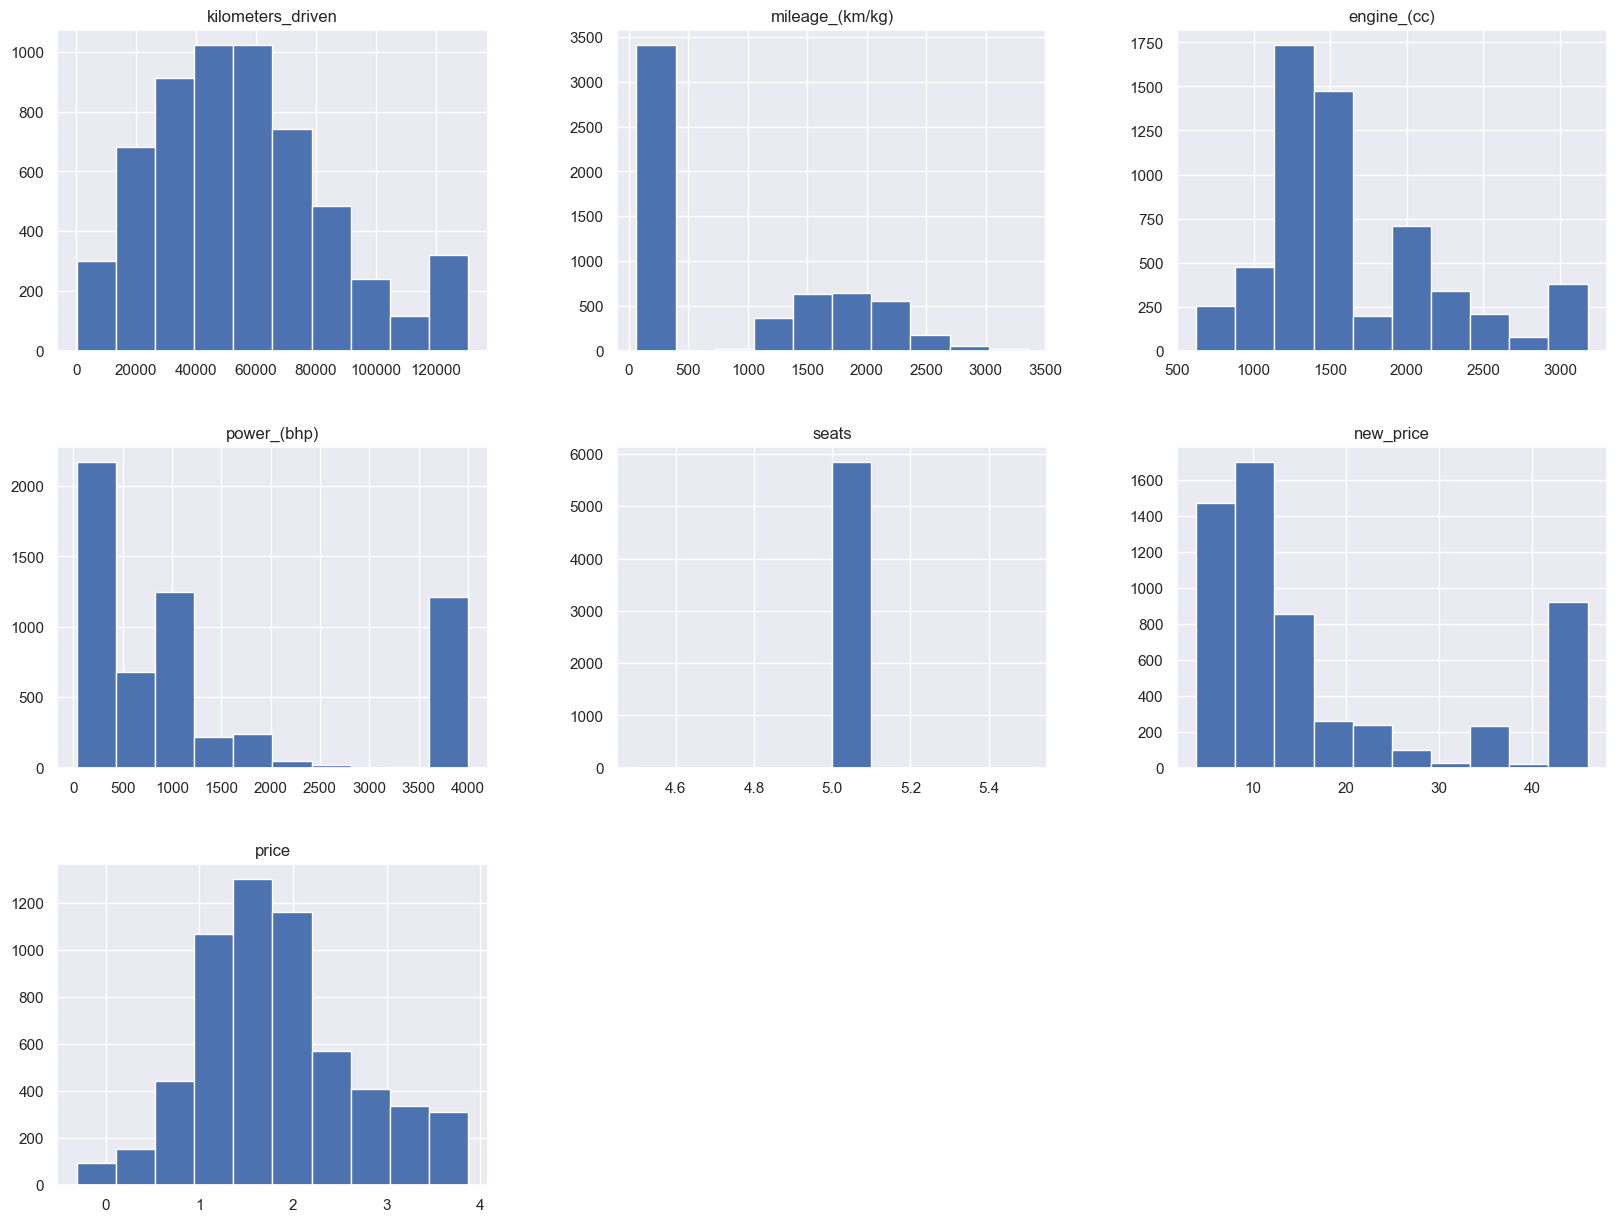

In [65]:
# To check for the data distribution

plt.figure(dpi = 200)
df.hist(figsize = (20, 15))
plt.show()

#### PRICE

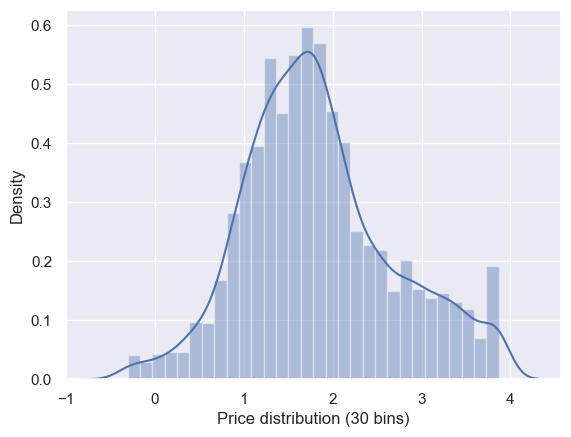

In [66]:
sns.distplot(df['price'], bins=30, kde=True, axlabel='Price distribution (30 bins)')
plt.show()

In [67]:
mean = df['price'].mean()
mode = df['price'].mode()
median = df['price'].median()

print(f'Mean for price is {(mean)}')
print(f'Median for price is {median}')
print(f'Mode for price is {mode}')

Mean for price is 1.838742226302094
Median for price is 1.7413425992542118
Mode for price is 0    3.869838
Name: price, dtype: float64


In [68]:
# logging the price

df['price'] = np.log(df['price'])

In [69]:
df.head()

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price
0,Mumbai,2010,72000.0,CNG,Manual,First,266.0,998,4002.5,5,5.51000,-0.580505
1,Pune,2015,41000.0,Diesel,Manual,First,1967.0,1582,1262.0,5,16.06000,0.926530
2,Chennai,2011,46000.0,Petrol,Manual,First,182.0,1199,887.0,5,8.61000,0.408180
3,Chennai,2012,87000.0,Diesel,Manual,First,2077.0,1248,4002.5,5,11.27000,0.583198
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,152.0,1968,1408.0,5,45.94125,1.056339


In [70]:
##### BIVARIATE ANALYSIS

<AxesSubplot: >

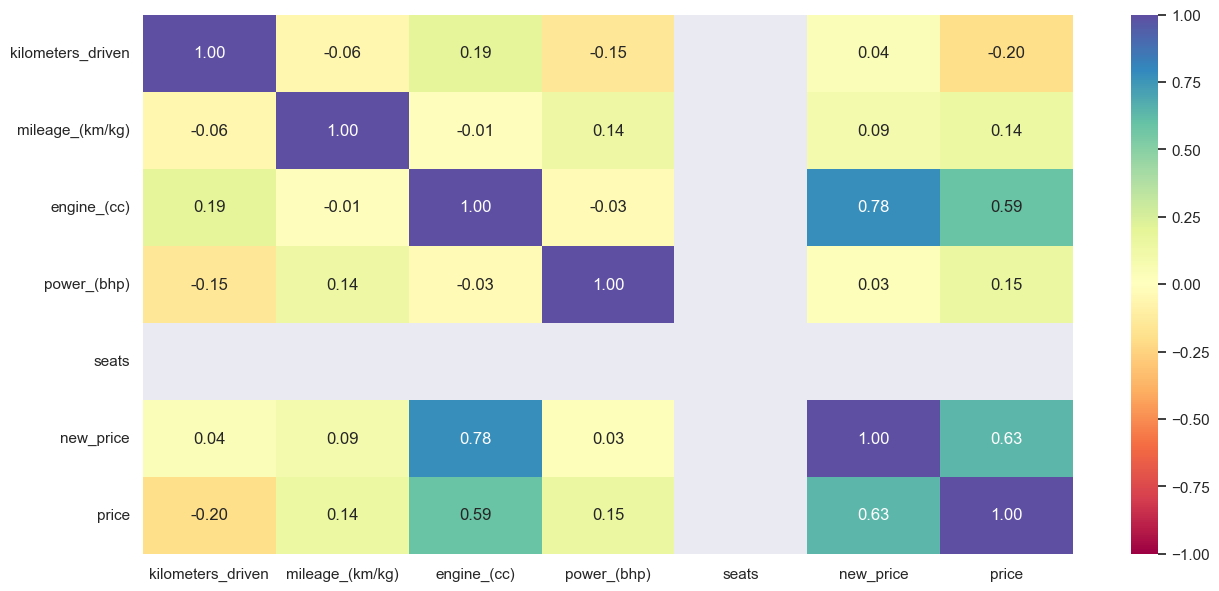

In [71]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

### from the plot , new price against engine is positively highly correlated

##### OUTLIER DETECTION


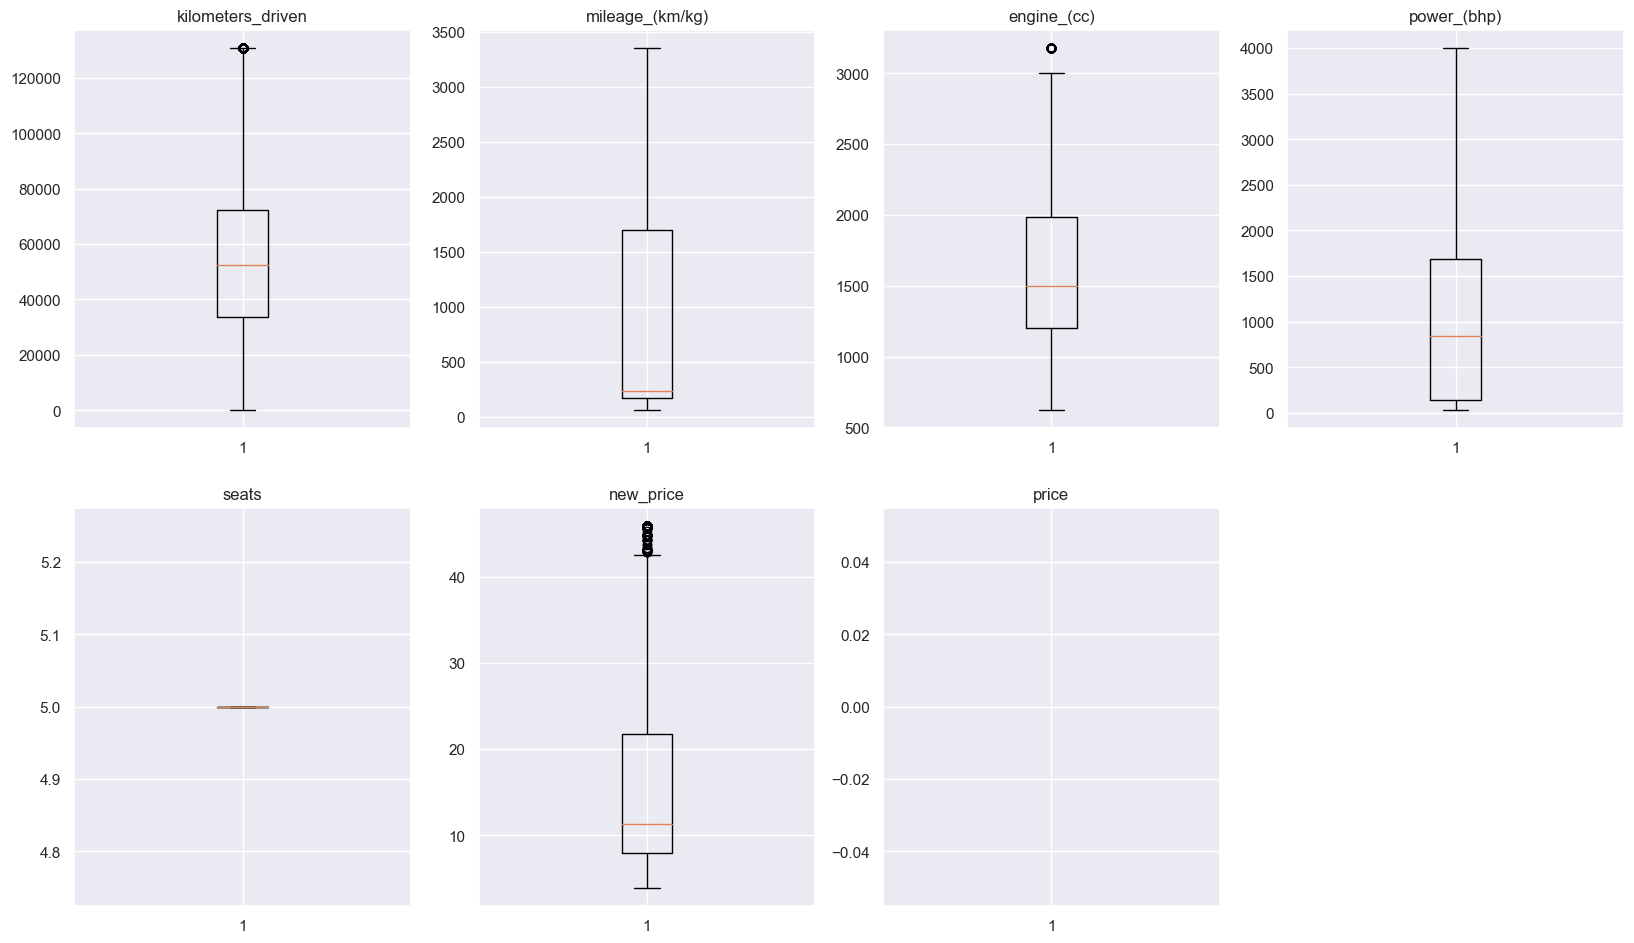

In [72]:
# outlier detection using boxplot
# use the numeric columns we created above
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)

plt.show()

### Observation 
### all numnerical variables have outliers
### year has only lower outliers
### price and new price has both upper outliers

In [73]:
#### OUTLIER TREATMENT

In [74]:
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [75]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

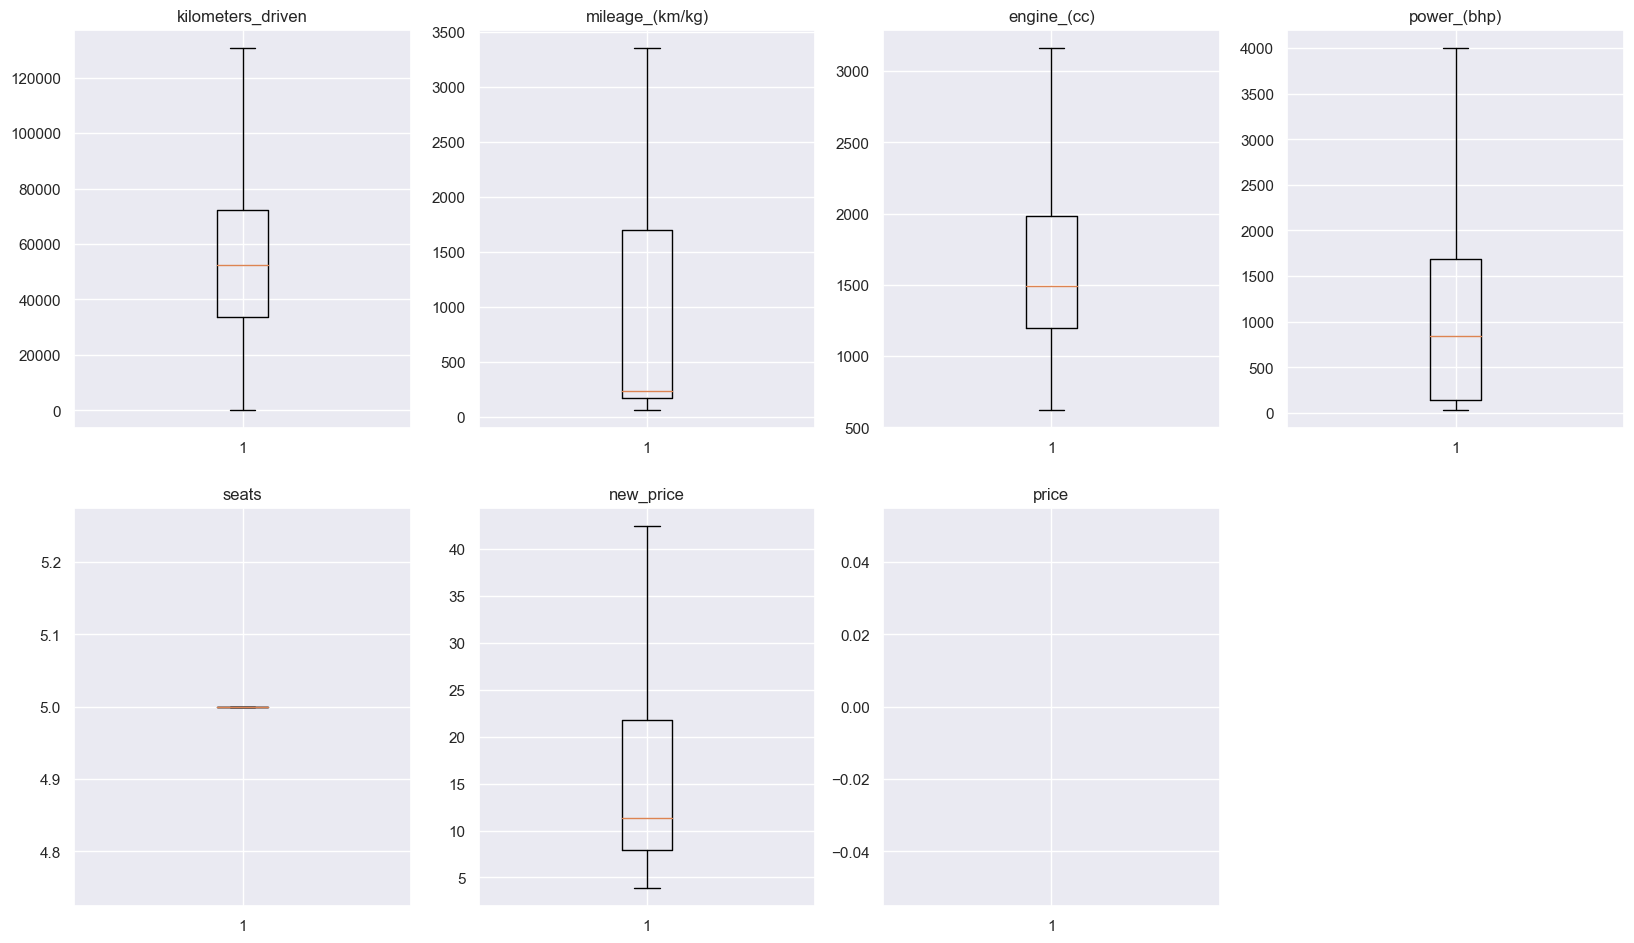

In [76]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    #plt.tight_layout()
    plt.title(variable)

plt.show()

## Linear Model Building

1. We want to predict the price of the used cars.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [77]:
# defining the dependent and independent variables

x = df.drop("price" , axis = 1)
y = df["price"]


In [78]:
# creating dummy variables
x = pd.get_dummies(x, drop_first= True) # one hot encoding
x.shape
x

,kilometers_driven,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_Manual,owner_type_Fourth & Above,owner_type_Second,owner_type_Third
0,72000.0,266.0,998,4002.5,5,5.510,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,41000.0,1967.0,1582,1262.0,5,16.060,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,46000.0,182.0,1199,887.0,5,8.610,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,87000.0,2077.0,1248,4002.5,5,11.270,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,40670.0,152.0,1968,1408.0,5,42.485,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365.0,284.0,1248,74.0,5,7.880,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
6015,100000.0,244.0,1120,71.0,5,8.230,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
6016,55000.0,140.0,2498,112.0,5,11.670,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
6017,46000.0,189.0,998,671.0,5,5.510,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [79]:
# splitting the data in 80:20 ratio for train to test data
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size= 0.2, random_state= 0)

In [80]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4675
Number of rows in test data = 1169


In [81]:
#### Normalize the data

In [82]:

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

In [ ]:
# Checking model performance on test set
test_pf = model_performance_regression(lin_reg, x_test_sc ,y_test)
test_pf
